<a href="https://colab.research.google.com/github/Snehalatha10/Snehalatha-Prakash/blob/main/House_Price_Prediction_Snehalatha_Prakash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
train_data = pd.read_csv("/content/train.csv")

In [87]:
test_data = pd.read_csv("/content/test.csv")

In [88]:
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

In [89]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [90]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [91]:
test.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

In [92]:
train.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [93]:
train.isnull().count

<bound method DataFrame.count of        POSTED_BY  UNDER_CONSTRUCTION   RERA  BHK_NO.  BHK_OR_RK  SQUARE_FT  \
0          False               False  False    False      False      False   
1          False               False  False    False      False      False   
2          False               False  False    False      False      False   
3          False               False  False    False      False      False   
4          False               False  False    False      False      False   
...          ...                 ...    ...      ...        ...        ...   
29446      False               False  False    False      False      False   
29447      False               False  False    False      False      False   
29448      False               False  False    False      False      False   
29449      False               False  False    False      False      False   
29450      False               False  False    False      False      False   

       READY_TO_MOVE  RESALE  

<Axes: >

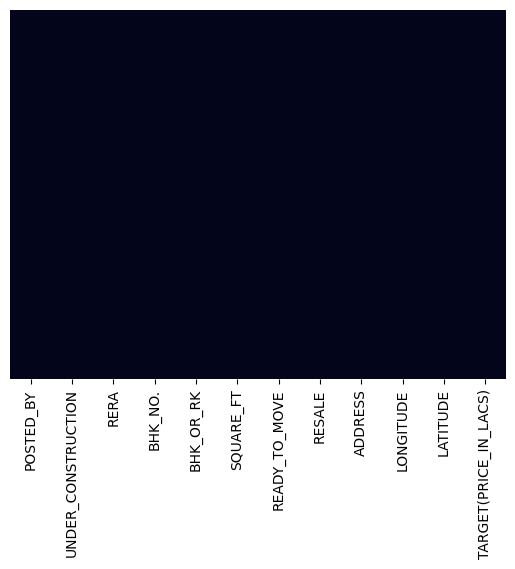

In [94]:
import seaborn as sns
sns.heatmap(train.isnull(),yticklabels=False, cbar=False)

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [96]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train['POSTED_BY']=label_encoder.fit_transform(train['POSTED_BY'])
train['BHK_OR_RK']=label_encoder.fit_transform(train['BHK_OR_RK'])
train['ADDRESS']=label_encoder.fit_transform(train['ADDRESS'])

In [97]:
test['POSTED_BY']=label_encoder.fit_transform(test['POSTED_BY'])
test['BHK_OR_RK']=label_encoder.fit_transform(test['BHK_OR_RK'])
test['ADDRESS']=label_encoder.fit_transform(test['ADDRESS'])

In [98]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911,60.5


In [99]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,2933,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,4852,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,4575,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,2885,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,3758,22.700000,72.870000


In [100]:
X=train.drop('TARGET(PRICE_IN_LACS)',axis=1)
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,5594,27.140626,78.043277
29447,2,0,0,2,0,769.230769,1,1,1510,39.945409,-86.150721
29448,1,0,0,2,0,1022.641509,1,1,150,26.928785,75.828002
29449,2,0,0,2,0,927.079009,1,1,5707,12.900150,80.227910


In [101]:
y=train['TARGET(PRICE_IN_LACS)']
y

0        55.0
1        51.0
2        43.0
3        62.5
4        60.5
         ... 
29446    45.0
29447    16.0
29448    27.1
29449    67.0
29450    27.8
Name: TARGET(PRICE_IN_LACS), Length: 29451, dtype: float64

In [102]:
#X.shape
test.shape

(39852, 11)

<Axes: >

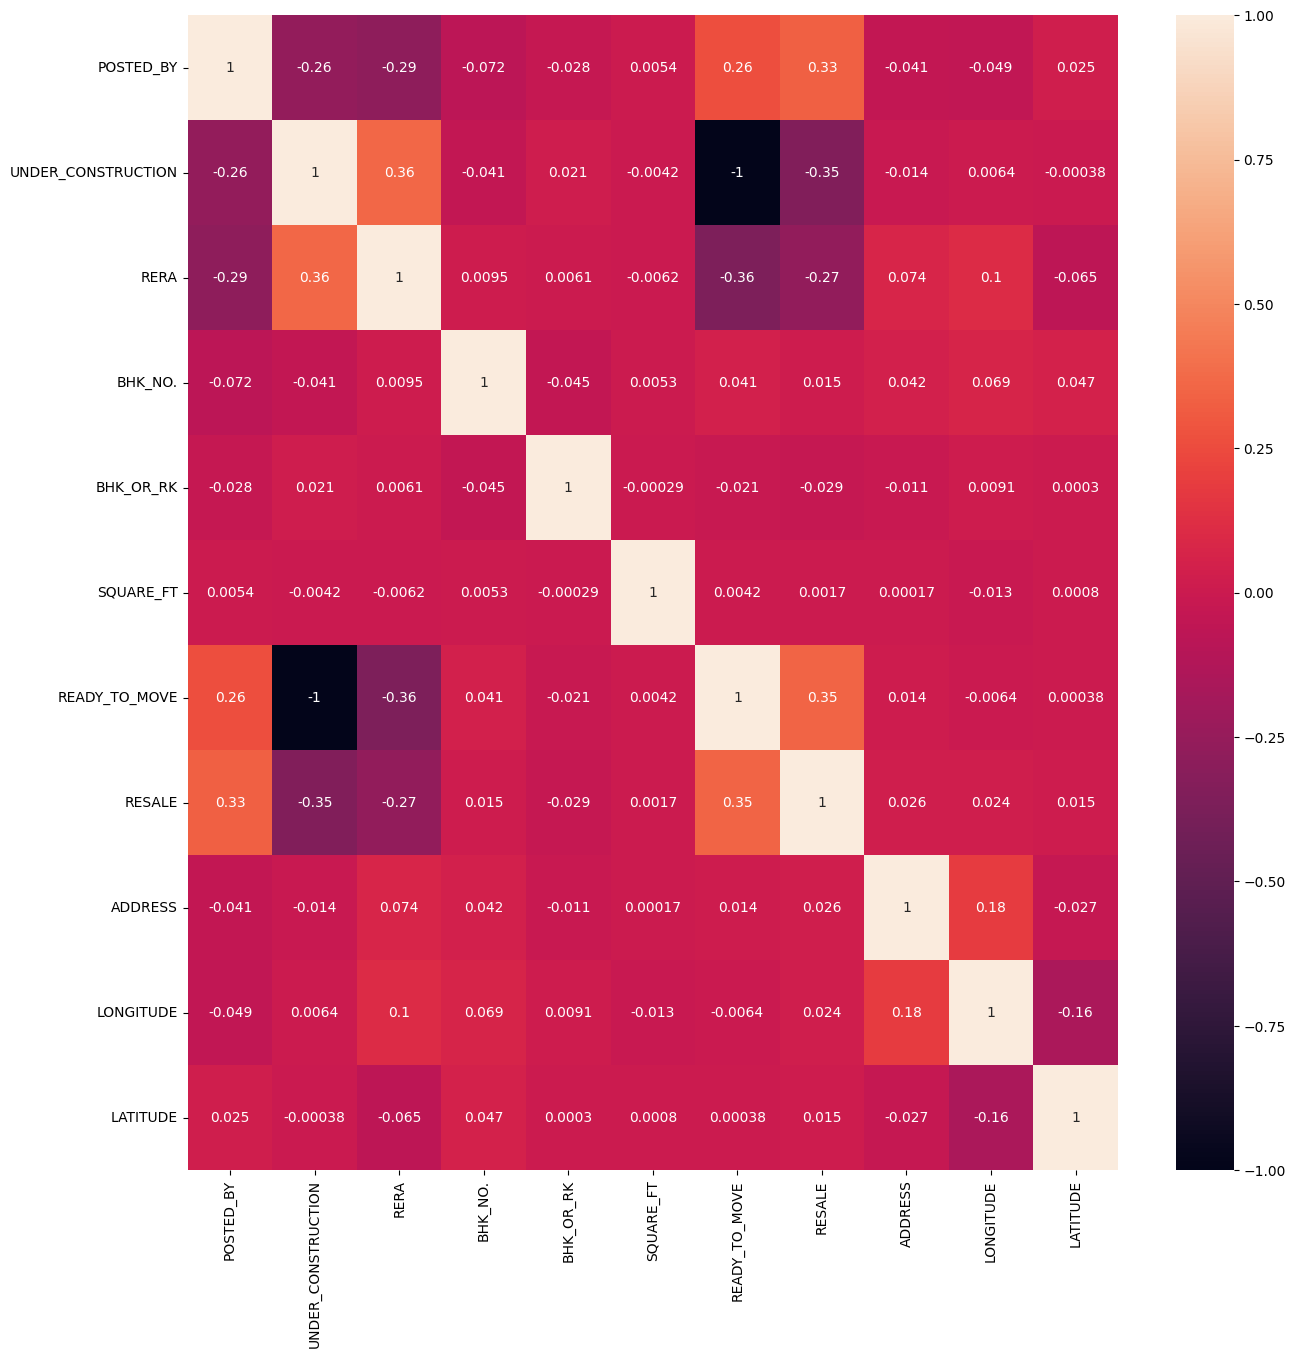

In [103]:
#correlation matrix for the dataset
cor=X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)

In [104]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
standard=scaler.transform(X)
standard

array([[ 1.28713168, -0.46813431, -0.68271456, ..., -0.35227112,
        -1.34247787,  0.07201136],
       [-0.65335028, -0.46813431, -0.68271456, ...,  1.52426846,
        -1.45454064, -0.01828927],
       [ 1.28713168, -0.46813431, -0.68271456, ..., -0.64793169,
        -1.37339983,  0.07525368],
       ...,
       [-0.65335028, -0.46813431, -0.68271456, ..., -1.70687927,
         0.90706647, -0.09563692],
       [ 1.28713168, -0.46813431, -0.68271456, ...,  1.08731431,
        -1.35372005,  0.32111704],
       [-0.65335028, -0.46813431,  1.464741  , ..., -0.69921975,
         0.89152595, -0.09433482]])

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
from sklearn import tree
from sklearn.metrics import r2_score
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
preds=model.predict(X_test)
print(r2_score(preds, y_test))

0.7013142130424899
